# Computo de Transf. Fourier (FFT) sobre datos reales

## Importación de Datos (Norwegian Endurance Athlete ECG Database)

Para trabajar en grupo y particularmente desde Colab, les recomiendo siempre usen Google Drive para guardar e importar las señales de interés. Para importar el drive personal de cada uno al .ipynb en el que quieran trabajar, se deben ejecutar las siguientes líneas de código.

In [5]:
import wfdb
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
directorio = "./external_files/" #ruta de la carpeta en la cuál se encuentran los archivos del atleta 1 (.dat y .hea)
for ecgfilename in sorted(os.listdir(directorio)):
    if ecgfilename.endswith(".dat"):
        ecgprueba = wfdb.rdsamp(directorio + ecgfilename.split(".")[0]) # estamos generando la ruta del archivo para levantarlo /content/drive/MyDrive/SyS Ayudantía/ath_001.dat
        print(ecgprueba)

(array([[ 0.20502, -0.02192, -0.20534, ...,  0.32206,  0.13324, -0.07612],
       [ 0.17286, -0.05116, -0.21658, ...,  0.30832,  0.11794, -0.09096],
       [ 0.10854, -0.07552, -0.1997 , ...,  0.2963 ,  0.1092 , -0.1021 ],
       ...,
       [ 0.62314,  0.00242, -0.46408, ...,  0.53164,  0.32328,  0.14292],
       [ 0.59098,  0.00242, -0.44158, ...,  0.52476,  0.32328,  0.14664],
       [ 0.56686,  0.00242, -0.4247 , ...,  0.51962,  0.32546,  0.15036]]), {'fs': 500, 'sig_len': 5000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': ['SL12: Sinus bradycardia with marked sinus arrhythmia, Right axis deviation, Borderline ECG', 'C: Sinus arrhythmia,  Normal ECG']})


Una vez que entendemos la forma en la que la información esta almacenada en el array extraemos alguna señal de ECG que nos interese, en este caso, la derivación I.

In [3]:
signalI=[]
i=0
while i<5000: #para cada fila de las 5000
  signalI.append(ecgprueba[0][i][0]) # el segundo 0 es porque quiero la derivacion I (hay información sobre las 12 derivaciones)
  i+=1

print('ECG Derivación I')
print(signalI)

ECG Derivación I
[0.20502, 0.17286, 0.10854, 0.10854, 0.12462, 0.10854, 0.09246, 0.08442, 0.06832, 0.08442, 0.08442, 0.07636, 0.06028, 0.08442, 0.08442, 0.06832, 0.06028, 0.03616, 0.02008, 0.02008, 0.0442, 0.02812, 0.01204, 0.02812, 0.03616, 0.01204, 0.03616, 0.05224, 0.0442, 0.05224, 0.05224, 0.02812, 0.02812, 0.02812, 0.03616, 0.05224, 0.02812, 0.03616, 0.03616, 0.03616, 0.02812, 0.05224, 0.07636, 0.05224, 0.0442, 0.0442, 0.06832, 0.06028, 0.0442, 0.03616, 0.06028, 0.05224, 0.05224, 0.05224, 0.06832, 0.07636, 0.06832, 0.06832, 0.06028, 0.02812, 0.02812, 0.07636, 0.1005, 0.08442, 0.06028, 0.06832, 0.06832, 0.06028, 0.0442, 0.05224, 0.0442, 0.03616, 0.03616, 0.0442, 0.0442, 0.0442, 0.03616, 0.03616, 0.0442, 0.06832, 0.06832, 0.06028, 0.03616, 0.02812, 0.03616, 0.06028, 0.03616, 0.02812, 0.0442, 0.05224, 0.02812, 0.02812, 0.02812, 0.06028, 0.01204, -0.0201, 0.02812, 0.03616, 0.03616, 0.0442, 0.02008, 0.02008, 0.02812, 0.02812, 0.03616, 0.004, 0.004, 0.02812, 0.03616, 0.05224, 0.05224, 0

# Transformada de Fourier

Ya con la signal I importada podemos trabajar con ella. Una herramienta muy útil y necesaria es la Transformada de Fourier. A continuación creamos una función para obtener la Transformada de Fourier con la funcion fft.fft de Numpy.

In [4]:
def transform_fourier(signalI,fs):
  # realizamos la transformada rápida de Fourier
  fourier_transform = np.fft.fft(signalI)
  frequencies = np.fft.fftfreq(len(signalI), 1/fs) # creamos un vector de frecuencias para graficar en base a este parámetro

  # si graficamos la transformada de Fourier vamos a notar una línea marcada sobre y = 0

  # para sacarla, tenemos que ordenar el vector de frequencias y también la transformada (la acomodamos acorde al nuevo vector)

  fourier_transform_ordenado=np.concatenate((fourier_transform[len(frequencies)//2:],fourier_transform[:len(frequencies)//2]))
  frequencies_ordenado = np.concatenate((frequencies[len(frequencies)//2:],frequencies[:len(frequencies)//2]))

  # graficamos la señal en el dominio del tiempo

  return frequencies_ordenado , fourier_transform_ordenado

Corremos nuestra función y obtenemos las gráficas correspondientes a la señal y su Transformada de Fourier.

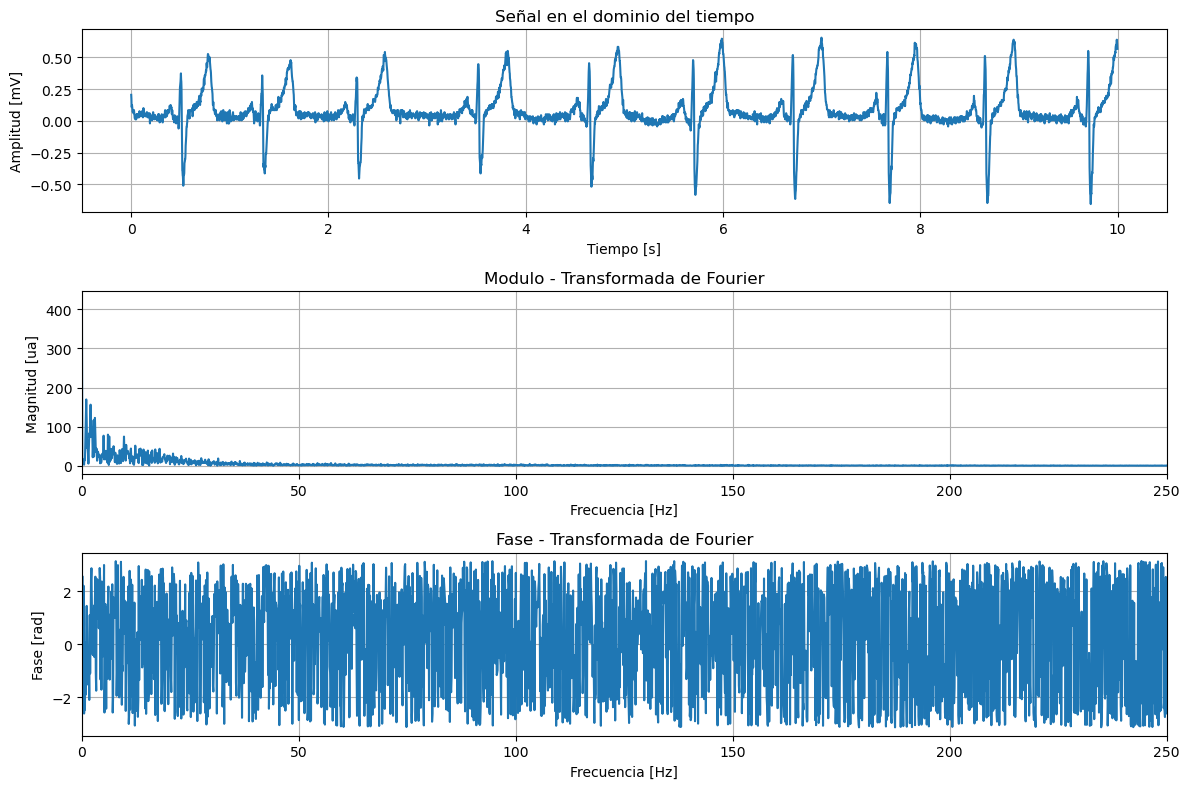

In [10]:
fs=500 # encontramos la frecuencia de muestreo en el archivo de Physionet
time = np.arange(len(signalI)) / fs # creamos un vector de tiempo para graficar en base a este parámetro y no en base a cantidad de muestras

# corremos la función para obtener la transformada
frequencies_ordenado , fourier_transform_ordenado = transform_fourier(signalI,fs)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, signalI)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.grid("on")

# graficamos la magnitud de la transformada de Fourier
plt.subplot(3, 1, 2)
plt.plot(frequencies_ordenado, np.abs(fourier_transform_ordenado))
plt.title('Modulo - Transformada de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [ua]')
plt.grid("on")
plt.xlim(0, fs/2)  # el gráfico de la transformada (por Nyquist) va a ir de  −𝐹𝑠/2  hasta  𝐹𝑠/2 pero elegimos graficar únicamente las positivas.

# graficamos la fase de la transformada de Fourier
plt.subplot(3, 1, 3)
plt.plot(frequencies_ordenado, np.angle(fourier_transform_ordenado))
plt.title('Fase - Transformada de Fourier')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.grid("on")
plt.xlim(0, fs/2)  # el gráfico de la transformada (por Nyquist) va a ir de  −𝐹𝑠/2  hasta  𝐹𝑠/2 pero elegimos graficar únicamente las positivas.

plt.tight_layout()
plt.show()
